# MNIST GAN 1.01

Near all of the architecture from run 1.0 is retained.

Changes:
  - Discriminator trained on mixed (real & fake) batches

In [10]:
from google.colab import files

import mnist_example as mnist_ex
import gan
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.backend import clear_session
from tensorflow.keras.datasets import mnist

import pickle

In [11]:
# mnist_ex.preprocess_real(save_only=True)
# real_train, real_test = pickle.load(open("mnist_train_tuple.p", "rb"))
# real_train.shape
(real_train, _), _ = mnist.load_data()
real_train = (np.expand_dims(real_train, axis=-1)/127.5 - 1.).astype("float32")
real_train.shape

(60000, 28, 28, 1)

In [23]:
reload(gan)

<module 'gan' from '/content/gan.py'>

In [24]:
clear_session()
model = gan.GAN(x_shape=real_train.shape[1:], kernal_size=5, verbose=True, lr=(1e-4, 2e-4))

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         51

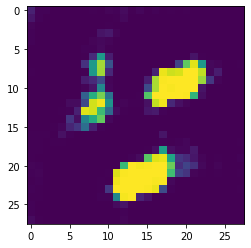

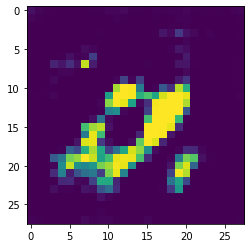

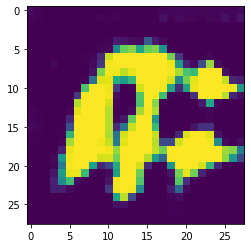

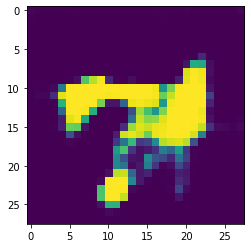

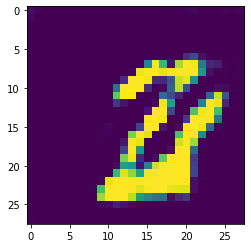

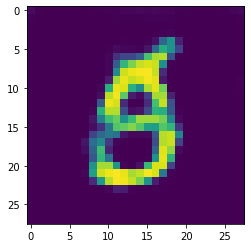

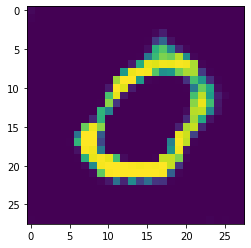

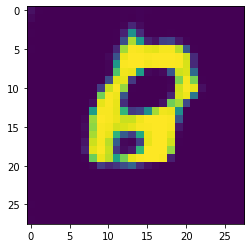

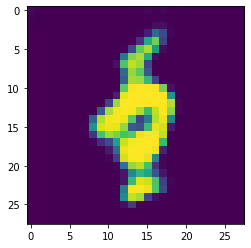

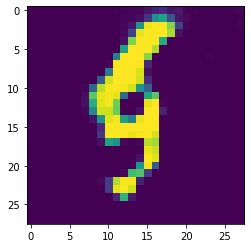

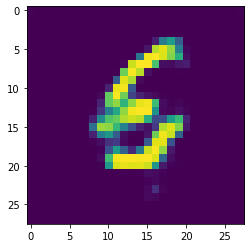

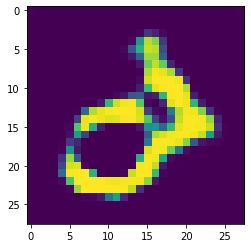

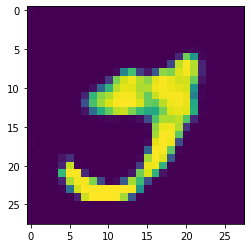

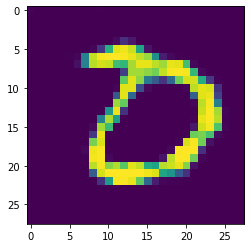

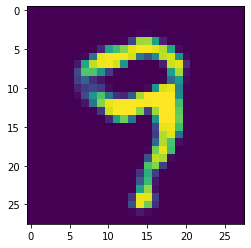

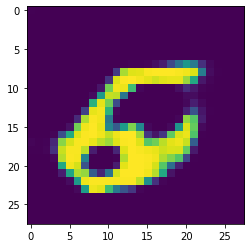

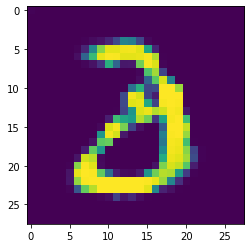

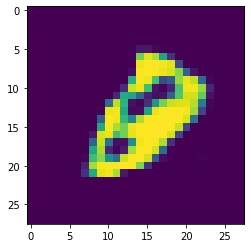

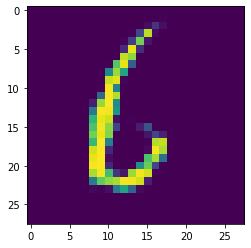

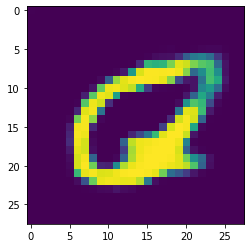

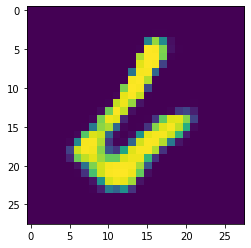

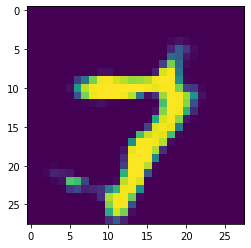

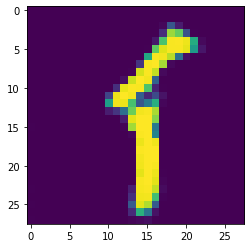

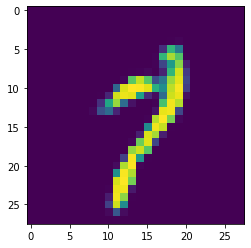

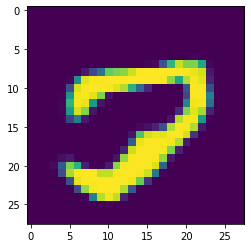

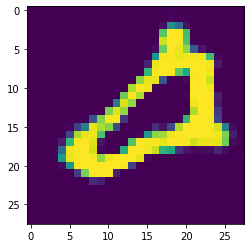

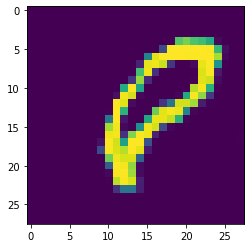

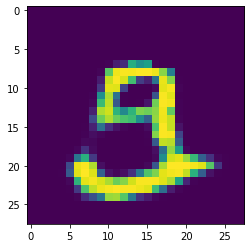

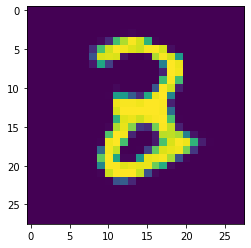

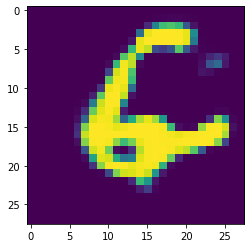

In [25]:
model.train(real_train, num_epochs=30, batch_size=60)

There does not seem to be any significant difference between the generated images in this run as compared to the run with unmixed batches (run 1.0).

Nevertheless, let us retain the unmixed batches as it is generally accepted that it produces more fruitful results for many problems. Also, from an intuitive point of view, we would expect unmixed batches to perform better than mixed.

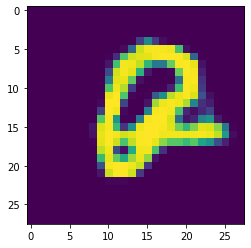

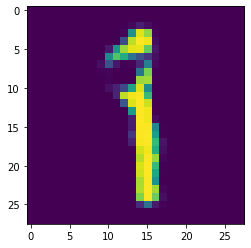

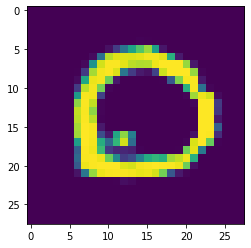

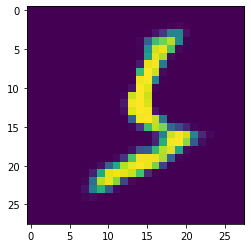

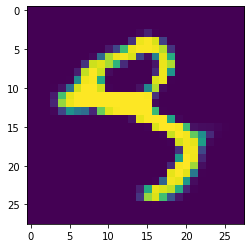

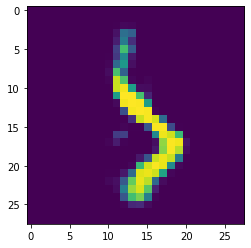

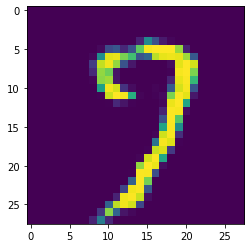

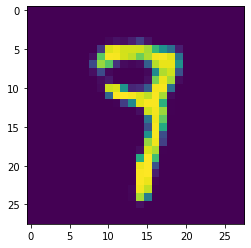

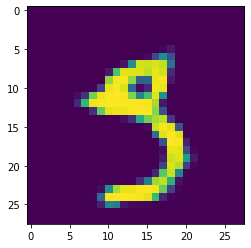

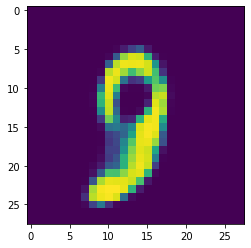

In [26]:
for _ in range(10):
  fake_img = model.generator.predict(np.random.randn(1, 100))
  plt.imshow(fake_img.reshape(28, 28))
  plt.show()

From the above, we can also see that there is evidence for modal collapse (to nine-like digits).

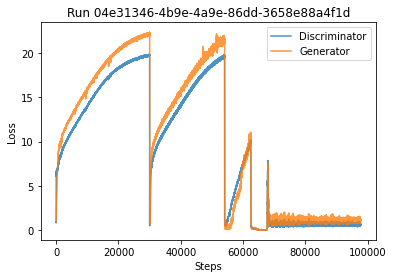

In [27]:
model.history.plot_loss()

The loss plot follows a very similar pattern to run 1.0;

  - Both losses follow each other closely
  - Losses repeatedly follow a pattern of a slow climb and sudden drop until they both suddenly stabilises at some small value.

In [28]:
!zip -r /content/temp_file.zip /content/Training_Runs
files.download("/content/temp_file.zip")

  adding: content/Training_Runs/ (stored 0%)
  adding: content/Training_Runs/ed6850ee-3d1a-4375-b854-7a6ce23e4588/ (stored 0%)
  adding: content/Training_Runs/ed6850ee-3d1a-4375-b854-7a6ce23e4588/img_epoch5.png (deflated 15%)
  adding: content/Training_Runs/ed6850ee-3d1a-4375-b854-7a6ce23e4588/img_epoch4.png (deflated 16%)
  adding: content/Training_Runs/ed6850ee-3d1a-4375-b854-7a6ce23e4588/model_summary.txt (deflated 86%)
  adding: content/Training_Runs/ed6850ee-3d1a-4375-b854-7a6ce23e4588/img_epoch1.png (deflated 14%)
  adding: content/Training_Runs/ed6850ee-3d1a-4375-b854-7a6ce23e4588/img_epoch3.png (deflated 15%)
  adding: content/Training_Runs/ed6850ee-3d1a-4375-b854-7a6ce23e4588/img_epoch2.png (deflated 17%)
  adding: content/Training_Runs/0350169f-bfda-4b34-9c34-7bea66db0f95/ (stored 0%)
  adding: content/Training_Runs/0350169f-bfda-4b34-9c34-7bea66db0f95/img_epoch5.png (deflated 13%)
  adding: content/Training_Runs/0350169f-bfda-4b34-9c34-7bea66db0f95/img_epoch4.png (deflated 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>